In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv(r'')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Check Nulls

<AxesSubplot:>

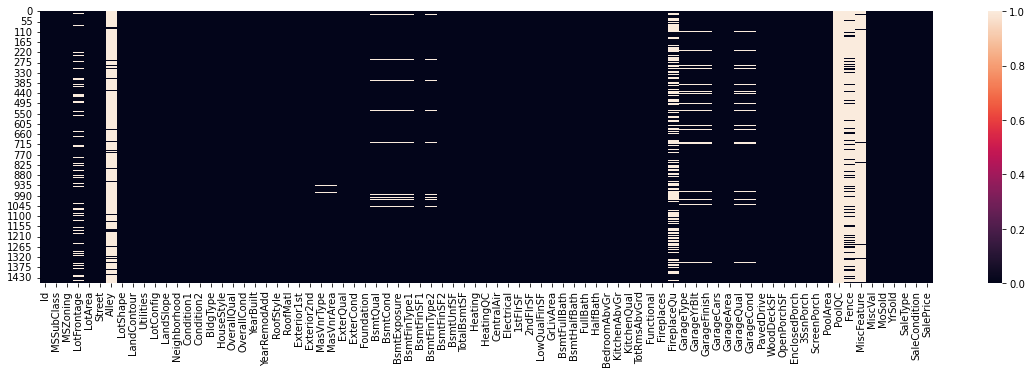

In [7]:
plt.figure(figsize=(20,5))

sns.heatmap(housing.isnull())

<AxesSubplot:>

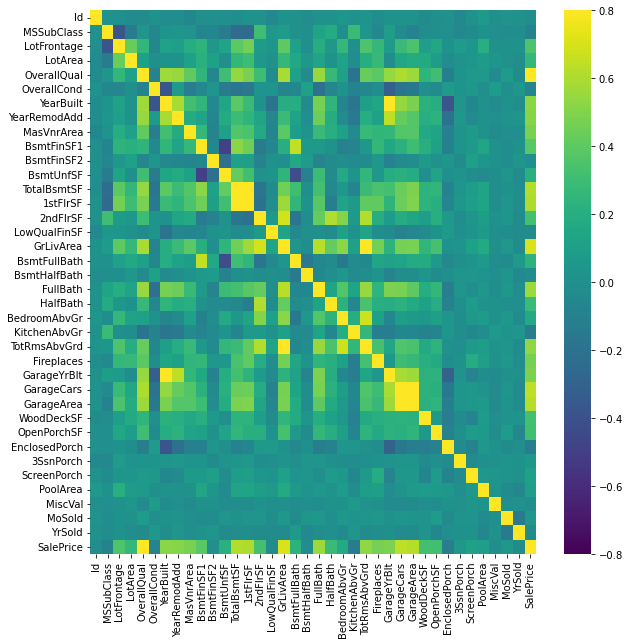

In [8]:
# Check Corr
plt.figure(figsize=(10,10))
sns.heatmap(housing.corr(), cmap='viridis', vmin = -0.8, vmax = 0.8 )

In [9]:
# Lets see the columns with nulls with respective number of nulls and follow one by one
housing.isnull().sum()[housing.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [10]:
# There are only 7 houses which have a pool, their conditions are "Fair" or above (so not much difference),
# also correlation is weak between SalePrice and 'PoolArea'. We can either remove or add hasPool column instead of the 2 pool
# related columns
housing['PoolQC'][housing['PoolArea'] > 0]

197     Ex
810     Fa
1170    Gd
1182    Ex
1298    Gd
1386    Fa
1423    Gd
Name: PoolQC, dtype: object

In [11]:
# Let's add hasPool and remove PoolArea & PoolQC
housing['hasPool'] = housing['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
housing.drop(['PoolArea', 'PoolQC'], axis = 1, inplace = True)

In [12]:
# For MiscFeature I think we can do the same - add hasMiscFeature
housing['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [13]:
housing['hasMiscFeature'] = housing['MiscFeature'].apply(lambda x: 0 if pd.isna(x) else 1)
housing.drop(['MiscFeature'], axis = 1, inplace = True)
housing['hasMiscFeature'].value_counts()

0    1406
1      54
Name: hasMiscFeature, dtype: int64

In [14]:
# Alley - NA means No Alley - so we can do the same
# (we could also do encoding here but too many nulls)
housing['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [15]:
housing['hasAlley'] = housing['Alley'].apply(lambda x: 0 if pd.isna(x) else 1)
housing.drop(['Alley'], axis = 1, inplace = True)
housing['hasAlley'].value_counts()

0    1369
1      91
Name: hasAlley, dtype: int64

In [16]:
# Fence - NA means No Fence - so we can do the same
# (we could also do encoding here but too many nulls)
housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [17]:
housing['hasFence'] = housing['Fence'].apply(lambda x: 0 if pd.isna(x) else 1)
housing.drop(['Fence'], axis = 1, inplace = True)
housing['hasFence'].value_counts()

0    1179
1     281
Name: hasFence, dtype: int64

In [18]:
# Encoding binary categories

c_binary = ['hasPool', 'hasMiscFeature', 'hasAlley', 'hasFence', 'SalePrice']

# FireplaceQu - we can change NA to No
housing['FireplaceQu'] = housing['FireplaceQu'].fillna("No")

# LotFrontage NA most likely mean 0 - there are no 0 values
housing['LotFrontage'] = housing['FireplaceQu'].fillna(0)

# Garage/Basement - for all Garage/Basement related fields NA means No
housing['GarageType'] = housing['GarageType'].fillna("No")
#housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].median())
housing['GarageFinish'] = housing['GarageFinish'].fillna("No")
housing['GarageQual'] = housing['GarageQual'].fillna("No")
housing['GarageCond'] = housing['GarageCond'].fillna("No")

housing['BsmtExposure'] = housing['BsmtExposure'].fillna("No")
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna("No")
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna("No")
housing['BsmtCond'] = housing['BsmtCond'].fillna("No")
housing['BsmtQual'] = housing['BsmtQual'].fillna("No")

# MasVnrType - NA = No / MasVnrArea NA = 0
housing['MasVnrType'] = housing['MasVnrType'].fillna("No")
housing['MasVnrArea'] = housing['MasVnrArea'].fillna("0")

In [19]:
housing = housing.dropna()
housing = housing.drop('Id', axis = 1)

<AxesSubplot:>

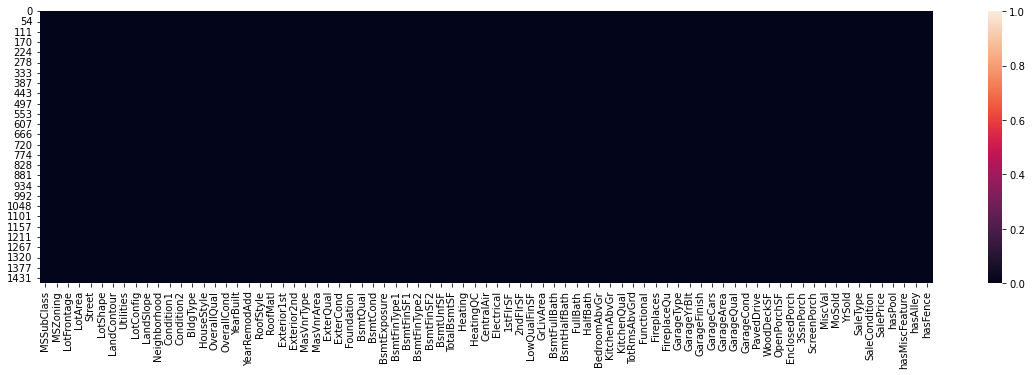

In [20]:
plt.figure(figsize=(20,5))

sns.heatmap(housing.isnull(), vmin = 0, vmax = 1)

In [21]:
def print_sales_corr(df):

    salescorr = df.corr()['SalePrice']

    corr = pd.DataFrame({'Col' : salescorr.index, 'Val' : np.round(salescorr.values,2)})
    corr.sort_values('Val',ascending = False, inplace = True)

    plt.figure(figsize=(10,10))
    sns.barplot(data = corr, x = 'Val', y = 'Col')

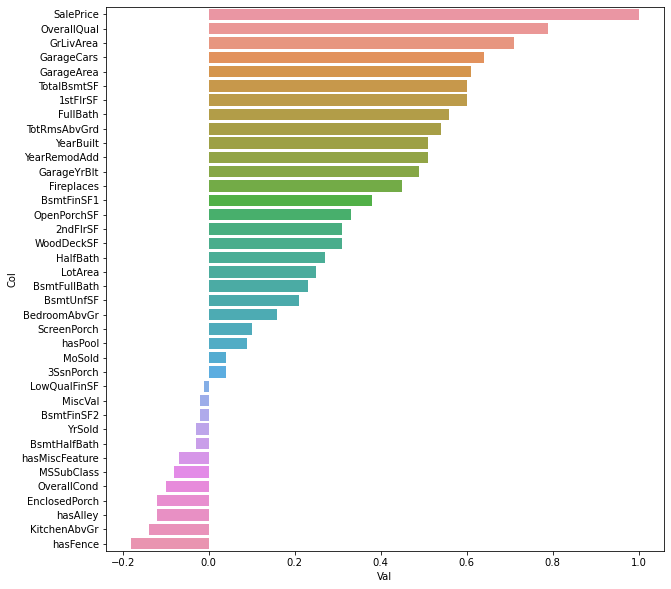

In [22]:
print_sales_corr(housing)

<AxesSubplot:>

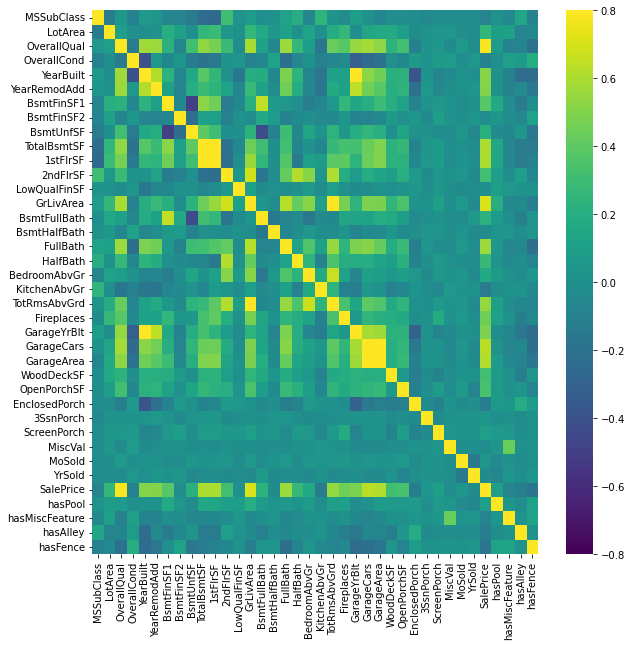

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(housing.corr(), cmap='viridis', vmin = -0.8, vmax = 0.8 )

In [24]:
# Remove highly correlated fields

# 1. GarageCars and GarageArea are basically the same, Cars is more correlated so we can leave GarageCars
# 2. Same with TotalBsmtSF and 1stFlrSF - leave TotalBsmtSF
# 3. YearBuilt - YearRemodelled - Leave YearBuilt
# 4. TotRmsAbvGround - GrLiveArea - Leave GrLiveArea
# 5. BsmtFinSF1 - BsmtUnfSF - Leave BsmtFinSF1
# 6. BsmtFullBath - BsmtFinSf1 - Leave BsmtFinSF1

In [25]:
housing.drop(['GarageArea', '1stFlrSF', 'YearRemodAdd', 'TotRmsAbvGrd', 'BsmtUnfSF', 'BsmtFullBath'],
             axis = 1, inplace = True)

In [26]:
# MSSubclass & "MoSold" are Categories so we should change their dtype to "object"
housing = housing.astype({"MSSubClass" : "object", "MoSold" : "object"})

In [27]:
# Encoding linear Categories
c_encoded = ['GarageQual', 'GarageCond', 'LotShape', 'Utilities']

housing['GarageQual'] = housing['GarageQual'].replace({
    'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5
})

housing['GarageCond'] = housing['GarageCond'].replace({
    'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5
})

housing['LotShape'] = housing['LotShape'].replace({
    'IR3' : 1 , 'IR2' : 2, 'IR1' : 3, 'Reg' : 4
})

housing['Utilities'] = housing['Utilities'].replace({
    'ELO' : 1, 'NoSeWa' : 2, 'NoSewr' : 3, 'AllPub' : 4
})

In [28]:
# Process Features
cat_features = housing.select_dtypes(include = ["object"]).columns
num_features = housing.select_dtypes(exclude = ["object"]).columns

housing_cat = housing[cat_features]
housing_num = housing[num_features].drop(c_binary, axis = 1)
housing_num = housing_num.drop(c_encoded, axis = 1)

In [29]:
from scipy.stats import skew

skewness = housing_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
skewed_features = skewness.index
housing_num[skewed_features] = np.log1p(housing_num[skewed_features])

In [30]:
housing_num[skewed_features]

,LotArea,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,HalfBath,KitchenAbvGr,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,9.042040,1.791759,7.602900,6.561031,0.000000,6.753438,6.751101,0.0,7.444833,0.000000,0.693147,0.693147,0.000000,7.602900,0.000000,4.127134,0.000000,0.0,0.0,0.000000
1,9.169623,2.197225,7.589336,6.886532,0.000000,7.141245,0.000000,0.0,7.141245,0.693147,0.000000,0.693147,0.693147,7.589336,5.700444,0.000000,0.000000,0.0,0.0,0.000000
2,9.328212,1.791759,7.601902,6.188264,0.000000,6.825460,6.765039,0.0,7.488294,0.000000,0.693147,0.693147,0.693147,7.601902,0.000000,3.761200,0.000000,0.0,0.0,0.000000
3,9.164401,1.791759,7.557995,5.379897,0.000000,6.629363,6.629363,0.0,7.448916,0.000000,0.000000,0.693147,0.693147,7.600402,0.000000,3.583519,5.609472,0.0,0.0,0.000000
4,9.565284,1.791759,7.601402,6.486161,0.000000,7.044033,6.960348,0.0,7.695758,0.000000,0.693147,0.693147,0.693147,7.601402,5.262690,4.442651,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,8.976894,1.791759,7.600902,0.000000,0.000000,6.860664,6.543912,0.0,7.407318,0.000000,0.693147,0.693147,0.693147,7.600902,0.000000,3.713572,0.000000,0.0,0.0,0.000000
1456,9.486152,1.945910,7.590347,6.673298,5.099866,7.341484,0.000000,0.0,7.637234,0.000000,0.000000,0.693147,1.098612,7.590347,5.857933,0.000000,0.000000,0.0,0.0,0.000000
1457,9.109746,2.302585,7.571474,5.620401,0.000000,7.050123,7.050123,0.0,7.758333,0.000000,0.000000,0.693147,1.098612,7.571474,0.000000,4.110874,0.000000,0.0,0.0,7.824446
1458,9.181735,1.945910,7.576097,3.912023,6.937314,6.983790,0.000000,0.0,6.983790,0.000000,0.000000,0.693147,0.000000,7.576097,5.905362,0.000000,4.727388,0.0,0.0,0.000000


In [31]:
housing_cat = pd.get_dummies(housing_cat, drop_first = True)

In [32]:
X = pd.concat([housing_num, housing_cat, housing[c_binary], housing[c_encoded]], axis = 1)
y = np.log1p(housing['SalePrice'])

In [33]:
# Check Corr

<AxesSubplot:>

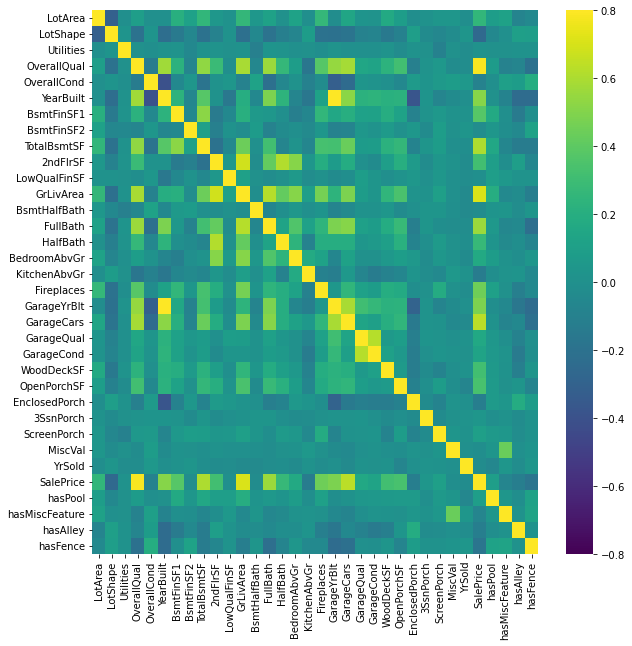

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(housing.corr(), cmap='viridis', vmin = -0.8, vmax = 0.8 )

In [35]:
def print_sales_corr(df):

    salescorr = df.corr()['SalePrice']

    corr = pd.DataFrame({'Col' : salescorr.index, 'Val' : np.round(salescorr.values,2)})
    corr.sort_values('Val',ascending = False, inplace = True)

    plt.figure(figsize=(10,10))
    sns.barplot(data = corr, x = 'Val', y = 'Col')

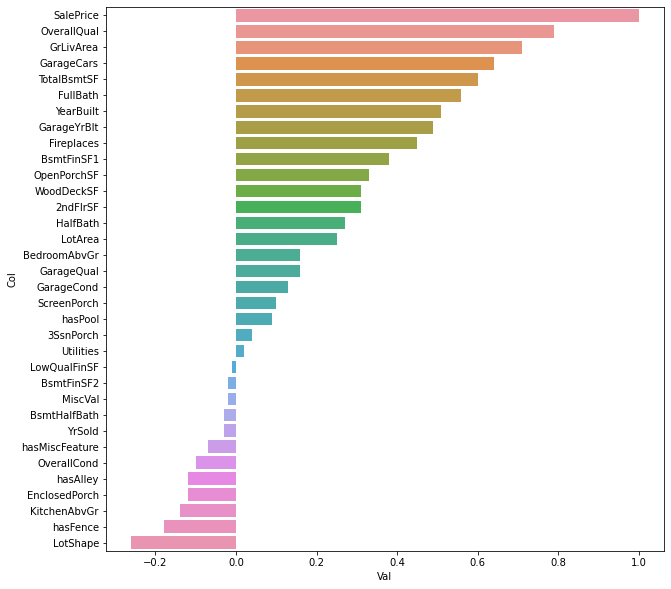

In [36]:
print_sales_corr(housing)

In [37]:
housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasPool,hasMiscFeature,hasAlley,hasFence
0,60,RL,No,8450,Pave,4,Lvl,4,Inside,Gtl,...,0,2,2008,WD,Normal,208500,0,0,0,0
1,20,RL,TA,9600,Pave,4,Lvl,4,FR2,Gtl,...,0,5,2007,WD,Normal,181500,0,0,0,0
2,60,RL,TA,11250,Pave,3,Lvl,4,Inside,Gtl,...,0,9,2008,WD,Normal,223500,0,0,0,0
3,70,RL,Gd,9550,Pave,3,Lvl,4,Corner,Gtl,...,0,2,2006,WD,Abnorml,140000,0,0,0,0
4,60,RL,TA,14260,Pave,3,Lvl,4,FR2,Gtl,...,0,12,2008,WD,Normal,250000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,TA,7917,Pave,4,Lvl,4,Inside,Gtl,...,0,8,2007,WD,Normal,175000,0,0,0,0
1456,20,RL,TA,13175,Pave,4,Lvl,4,Inside,Gtl,...,0,2,2010,WD,Normal,210000,0,0,0,1
1457,70,RL,Gd,9042,Pave,4,Lvl,4,Inside,Gtl,...,2500,5,2010,WD,Normal,266500,0,1,0,1
1458,20,RL,No,9717,Pave,4,Lvl,4,Inside,Gtl,...,0,4,2010,WD,Normal,142125,0,0,0,0


# Split data into Train and Test

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
num_features = num_features.drop(['SalePrice'])

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.loc[:, num_features] = scaler.fit_transform(X_train.loc[:, num_features])
X_test.loc[:, num_features] = scaler.fit_transform(X_test.loc[:, num_features])

C:\Users\Rog\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Rog\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


# Model Selection

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost.sklearn import XGBRegressor

In [43]:
def predict(X_train, y_train, X_test, y_test, elasticnet_a = 0.01):
    model = []
    rmse = []
    
    # Polynomial
    polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2, include_bias = False)),
    ("lin_reg", LinearRegression())
    ])
    
    polynomial_regression.fit(X_train, y_train)
    y_pred = polynomial_regression.predict(X_test)
    
    model.append('Polynomial')
    rmse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    # RidgeCV
    ridge_reg = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 13, 17, 22, 30, 60])
    ridge_reg.fit(X_train, y_train)
    y_pred = ridge_reg.predict(X_test)
    
    alpha = ridge_reg.alpha_
    
    model.append('RidgeCV')
    rmse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    # Lasso
    lasso_reg = LassoCV(alphas = [0.001, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 13, 17, 22, 30])
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)
    
    model.append('LassoCV')
    rmse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    
    # LassoLarsCV
    lasso_lars = LassoLarsCV(max_iter = 10000)
    lasso_lars.fit(X_train, y_train)
    y_pred = lasso_lars.predict(X_test)
    
    model.append('LassoLarsCV')
    rmse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    
    # ElasticNet
    en_reg = ElasticNetCV(l1_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 0.95, 1],
                        alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 13, 17, 22, 30, 60],
                        max_iter = 50000, cv = 10)
    en_reg.fit(X_train, y_train)
    y_pred = en_reg.predict(X_test)
    
    model.append('ElasticNet')
    rmse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    # SGDRegressor
    # sgd_reg = SGDRegressor()
    # sgd_reg.fit(X_train,y_train)
    # y_pred = sgd_reg.predict(X_test)
    
    # model.append('SGDRegressor')
    # rmse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    # DecisionTreeRegressor
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(X_test)
    
    model.append('DecisionTreeRegressor')
    rmse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    # RandomForestRegressor
    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)
    y_pred = rf_reg.predict(X_test)
    
    model.append('RandomForestRegressor')
    rmse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    # GradientBoostingRegressor
    GBR_reg = GradientBoostingRegressor()
    GBR_reg.fit(X_train,y_train)
    y_pred = GBR_reg.predict(X_test)
    
    model.append('GradientBoostingRegressor')
    rmse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    # CatBoostRegressor
    #cat_reg = GradientBoostingRegressor()
    #cat_reg.fit(X_train,y_train)
    #y_pred = cat_reg.predict(X_test)
    
    #model.append('CatBoostRegressor')
    #rmse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    # XGBRegressor
    xgbr_reg = XGBRegressor()
    xgbr_reg.fit(X_train,y_train)
    y_pred = xgbr_reg.predict(X_test)
    
    model.append('XGBRegressor')
    rmse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    
    # Move values to DF & Sort ASC
    df = pd.DataFrame()
    df['model'] = model
    df['rmse'] = rmse
    
    df.sort_values('rmse', inplace=True)
    
    # Plot
    plt.figure(figsize = (10,5))
    sns.barplot(x = df['rmse'], y = df['model'])
    plt.show()
    
    print(df)
    
    

C:\Users\Rog\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=8.468e-04, with an active set of 15 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\Rog\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 16 iterations, i.e. alpha=8.365e-04, with an active set of 16 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\Rog\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=8.078e-0

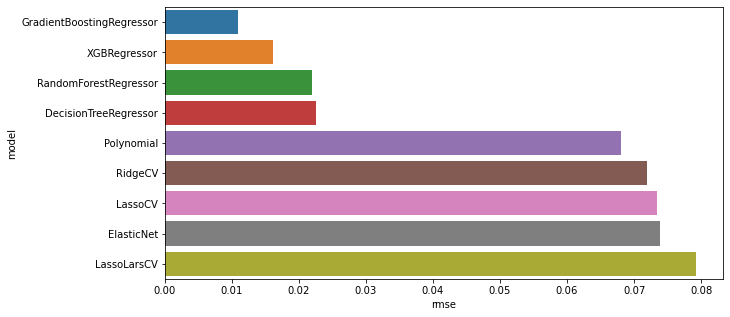

                       model      rmse
7  GradientBoostingRegressor  0.010967
8               XGBRegressor  0.016180
6      RandomForestRegressor  0.021892
5      DecisionTreeRegressor  0.022496
0                 Polynomial  0.068062
1                    RidgeCV  0.071926
2                    LassoCV  0.073428
4                 ElasticNet  0.073886
3                LassoLarsCV  0.079296


In [44]:
predict(X_train, y_train, X_test, y_test)

In [45]:
# Tune Ridge
from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 13, 17, 20, 22, 23, 30, 60])
ridge_reg.fit(X_train, y_train)

alpha = ridge_reg.alpha_
y_pred = ridge_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred, y_test)))

0.07192570397371645


In [46]:
ridge_reg = RidgeCV(alphas = [alpha, alpha * 0.85, alpha * 0.9, alpha * 0.95, alpha, alpha * 1.1, alpha * 1.2, alpha * 1.3])
ridge_reg.fit(X_train, y_train)
print(ridge_reg.alpha_)

17.0


Ridge picked 505 features and eliminated the other 78 features


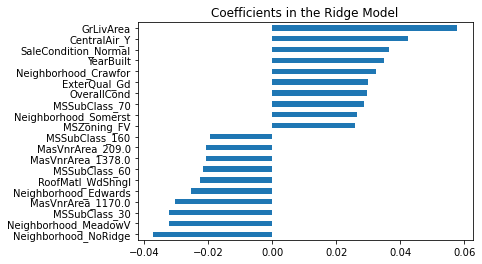

In [47]:
coefs = pd.Series(ridge_reg.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()